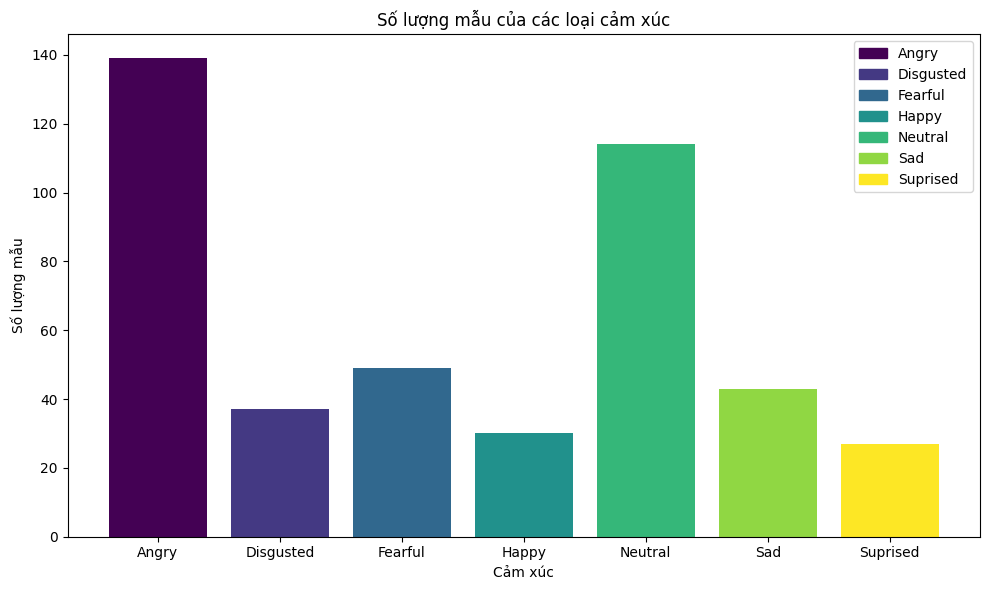

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Đường dẫn đến thư mục chứa dữ liệu
folder_path = r"D:\data_analysis\speech_emotion_recognition\data\VietnameseDataset\raw"

# Tạo một danh sách để lưu trữ số lượng tệp trong mỗi thư mục
num_files_in_folders = []

# Lặp qua tất cả các thư mục trong thư mục chính
for folder_name in os.listdir(folder_path):
    # Xây dựng đường dẫn đầy đủ đến thư mục con
    subfolder_path = os.path.join(folder_path, folder_name)
    
    # Đếm số lượng tệp trong thư mục con và thêm vào danh sách
    num_files = len(os.listdir(subfolder_path))
    num_files_in_folders.append((folder_name, num_files))

folders, num_files = zip(*num_files_in_folders)
colors = plt.cm.viridis(np.linspace(0, 1, len(folders)))

plt.figure(figsize=(10, 6))
bars = plt.bar(folders, num_files, color=colors)
plt.xlabel('Cảm xúc')
plt.ylabel('Số lượng mẫu')
plt.title('Số lượng mẫu của các loại cảm xúc')

legend_labels = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_labels, folders)

plt.xticks()
plt.tight_layout()
plt.show()


In [3]:
from modules.fine_tuning.feature_statistics_fine_tuning_using_cnn_model import FineTuningModel
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Đường dẫn tới mô hình CNN đã huấn luyện trước
model_path = r"D:\data_analysis\speech_emotion_recognition\best_model\best_cnn_model_weights_using_feature_statistics_40.keras"

# Khởi tạo đối tượng FineTuningModel
fine_tuner = FineTuningModel(model_path)

# Tải dữ liệu
X_train, y_train = fine_tuner.load_data(r"D:\data_analysis\speech_emotion_recognition\data\VietnameseDataset\features\statistic_features\train.csv")
X_test, y_test = fine_tuner.load_data(r"D:\data_analysis\speech_emotion_recognition\data\VietnameseDataset\features\statistic_features\test.csv")
X_val, y_val = fine_tuner.load_data(r"D:\data_analysis\speech_emotion_recognition\data\VietnameseDataset\features\statistic_features\validation.csv")

# Mã hóa nhãn (giả sử rằng y_train, y_val, y_test là mảng phẳng trước khi mã hóa)
y_train_encoded, y_val_encoded, y_test_encoded = fine_tuner.encode_labels(y_train, y_val, y_test)

# Huấn luyện mô hình với fine-tuning và class weights
fine_tuner.fit_model(X_train, y_train_encoded, X_val, y_val_encoded)

# Đánh giá mô hình
fine_tuner.evaluate_model(X_test, y_test_encoded)

# Vẽ biểu đồ độ chính xác
fine_tuner.plot_training_history()

# Vẽ ma trận nhầm lẫn
fine_tuner.plot_confusion_matrix(X_test, y_test_encoded)


TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
from modules.fine_tuning.feature_statistics_fine_tuning_using_cnn_model import FineTuningModel

# Đường dẫn tới mô hình CNN đã huấn luyện trước
model_path = r"D:\data_analysis\speech_emotion_recognition\best_model\best_cnn_model_weights_using_feature_statistics_13.keras"

# Khởi tạo đối tượng FineTuningModel
fine_tuner = FineTuningModel(model_path)

# Tải dữ liệu
X_train, y_train = fine_tuner.load_data(r"D:\data_analysis\speech_emotion_recognition\data\VietnameseDataset\features\statistic_features\train.csv")
X_test, y_test = fine_tuner.load_data(r"D:\data_analysis\speech_emotion_recognition\data\VietnameseDataset\features\statistic_features\test.csv")
X_val, y_val = fine_tuner.load_data(r"D:\data_analysis\speech_emotion_recognition\data\VietnameseDataset\features\statistic_features\validation.csv")

# Mã hóa nhãn
y_train_encoded, y_val_encoded, y_test_encoded = fine_tuner.encode_labels(y_train, y_val, y_test)

# Huấn luyện mô hình với fine-tuning
fine_tuner.fit_model(X_train, y_train_encoded, X_val, y_val_encoded)

# Đánh giá mô hình
fine_tuner.evaluate_model(X_test, y_test_encoded)

# Vẽ biểu đồ độ chính xác
fine_tuner.plot_training_history()

# Vẽ ma trận nhầm lẫn
fine_tuner.plot_confusion_matrix(X_test, y_test_encoded)


Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 5376, but received input with shape (None, 7936)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 244), dtype=float32)
  • training=True
  • mask=None